# Exercise 10.1-Relighting (3 + 3 + 13 + 7 = 26 points)
## Reflectance Fields
In this exercise, you will work with a reflectance field to do image relighting.
The material contains of 256 images in a binary foating point format called `rf_i_j.bin`. These files make up a small reflectance field. Each image was acquired with a (distant) point light source at position $(i,j)$
on the hemisphere over the object.  
$i$ denotes the elevation angle $\theta$ (theta) of the light source, $j$ stands for the rotation angle $\phi$ (phi) around the upward y-axis.  
The 90 degrees of possible elevation angles have been divided into 8 parts, the 360 degrees of possible rotation angles into 32 parts each. The pole $(i = 0)$ of the hemisphere is a special case: Here, all 32 rotations are on the same point, the pole itself.  
The `Helper_function.py` provides a function called `import_bin_files` that allows you to easily read the .bin files into numpy arrays. Furthermore, there is a function called `create_image_dataset` which reads all files of the refectance field into a ndarry `image_dataset` which can be accessed through `image_dataset [i,j,:,:,:]`.
<br>Figure 1 shows images relighted with different environment maps.



<figure style="text-align:center">
    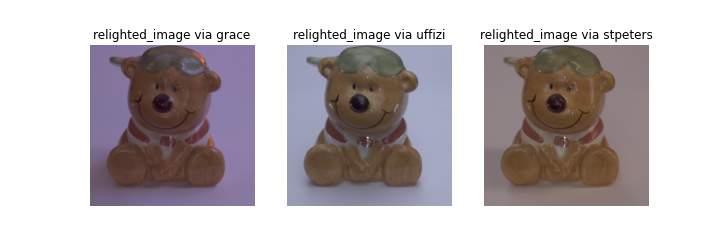
    <figcaption>Figure 1: Relighted images using grace, uffizi, and stpeters maps</figcaption>
</figure>




In [1]:
# imports
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tqdm import tqdm
import numpy as np
import math
import cv2
import struct
from skimage.io import imread
import matplotlib.pyplot as plt
from PIL import Image

from Helper_functions import *

In [2]:
# Define paths:
rfPath = "rf_bin"
envPath = "polar"
resultPath = "result_relighting"

## Load the environments
### a) (1+2 p)
Load environment maps from the folder polar using `import_bin_files` function and visualize them here:

<br><b>TODO:<b>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


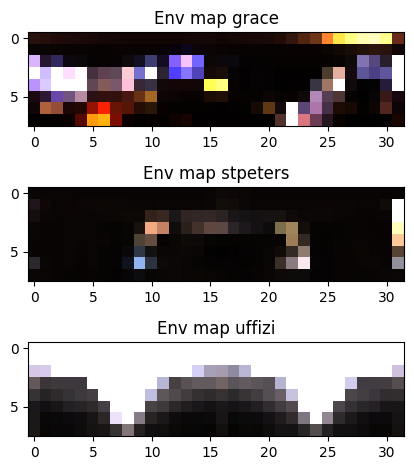

In [28]:
from Helper_functions import import_bin_files

# Read in the environment maps
grace = import_bin_files(f"{envPath}/grace.bin")
stpeters = import_bin_files(f"{envPath}/stpeters.bin")
uffizi = import_bin_files(f"{envPath}/uffizi.bin")

# Visualization of the maps
fig, ax = plt.subplots(3,1)
ax[0].imshow(grace / 255)
ax[0].set_title("Env map grace")
ax[1].imshow(stpeters / 255)
ax[1].set_title("Env map stpeters")
ax[2].imshow(uffizi / 255)
ax[2].set_title("Env map uffizi")
fig.tight_layout()

## Read Image Dataset
### b) (1+2 p)
Create an image dataset by calling create_image_dataset(rfPath) and plot one of the images inside.

<br><b>TODO:<b>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


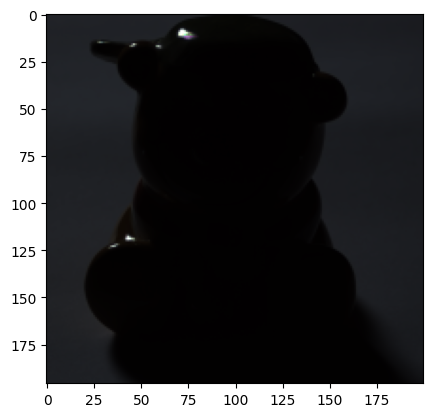

In [48]:
# Create image dataset by calling create_image_dataset funtion
images = create_image_dataset(rfPath)

# Visualization
plt.imshow(images[5,10])

## Relighting
### c) (13 p)
Your task is to relight the image dataset with the provided environment maps in the polar folder.<br>
 We parametrized these environments the same as the reflectance field (over angles theta and phi) and rescaled them to 8x32 pixels.
 
<br><b>TODO:<b>

In [118]:
def relight(env_file: np.ndarray, image_dataset: np.ndarray) -> np.ndarray:
    return (image_dataset * env_file[:,:,None,None,:]).mean(axis=(0,1)).astype(np.float32)

## Apply relighting, tonemapping and visualizing 
### d) (3+3+1 p)
1. Apply relighting using your implemented function here.<br>
<br>
2. To visualize your relighted results properly, you can tonemap them by functions available in the OpenCV (cv2) library:<br>
* first create a tonemapper obj with:            `tonemapper=cv2.createTonemap(float gamma)`
* apply tonemapping via `.process()` function:   `tonemapped_img=tonemapper.process(image)`
* you can find more about tonemapping with cv2 here: [tonemapping](https://docs.opencv.org/3.4/d8/d5e/classcv_1_1Tonemap.html).
* a good scientific introduction into tonemapping can be found in [Mantiuk08](https://people.mpi-inf.mpg.de/~mantiuk/papers/mantiuk08mgtmo.pdf).

3. Plot tonemapped results here. Your results should look like Figure 1.<br>
<br> <b>Hint: When displaying your images, you normalize them or apply a tonemapping to your float valued images (as explained above).
    
<b>TODO:<b>

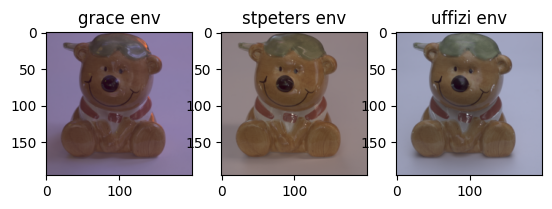

In [120]:
# Load the environments here.
grace = import_bin_files(f"{envPath}/grace.bin")
stpeters = import_bin_files(f"{envPath}/stpeters.bin")
uffizi = import_bin_files(f"{envPath}/uffizi.bin")

# Do the relighting using the function you implemented.
grace_relight = relight(grace, images)
stpeters_relight = relight(stpeters, images)
uffizi_relight = relight(uffizi, images)

# Do tonemapping using cv2 library.
tonemapper = cv2.createTonemap(2.2)

# Visualization of tonemapped images.
fig, ax = plt.subplots(1,3)
ax[0].imshow(tonemapper.process(grace_relight))
ax[0].set_title("grace env")
ax[1].imshow(tonemapper.process(stpeters_relight))
ax[1].set_title("stpeters env")
ax[2].imshow(tonemapper.process(uffizi_relight))
_ = ax[2].set_title("uffizi env")